Importing Libraries

In [3]:
import random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Data Generation Based on given Code 

In [4]:
id_1 = 7721 #change to first student id
id_2 = 7818 #change to second student id
id_3 = 0000 #change to third student id "leave 0000 if team of 2"
random_seed = id_1+id_2+id_3
random.seed(random_seed)
data_path="Data.csv"#replace with data path
output_path="MyData.csv"#replace with output data path

all_data=pd.read_csv(data_path) 
all_columns = all_data.columns.tolist()

target_column = 'smoking'  

all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)

print(selected_columns) #MUST BE PRINTED
selected_columns = np.append(selected_columns, target_column)
sample_df = all_data[selected_columns].copy()
sample_df.to_csv(output_path)   #From HERE YOU CAN SPLIT FOR TRAIN ,VALID AND TEST


['hearing(left)', 'Cholesterol', 'ALT', 'eyesight(left)', 'waist(cm)', 'hearing(right)', 'dental caries', 'hemoglobin', 'weight(kg)', 'serum creatinine']


Data Check and normalization

In [5]:
# Load the dataset
data = pd.read_csv("MyData.csv") 

# Drop the first column by index
data = data.drop(data.columns[0], axis=1)

# save the updated dataset back to a CSV file
data.to_csv("MyData_updated.csv", index=False)

# Display the first few rows
print("First few rows of the dataset:")
display(data.head())

# Overview of the dataset
print("\nDataset Information:")
data.info()

print("\nStatistical Summary:")
display(data.describe())



First few rows of the dataset:


,hearing(left),Cholesterol,ALT,eyesight(left),waist(cm),hearing(right),dental caries,hemoglobin,weight(kg),serum creatinine,smoking
0,1,172,25,0.5,81.0,1,0,16.5,60,1.0,1
1,2,194,23,0.6,89.0,2,1,16.2,65,1.1,0
2,1,178,31,0.4,81.0,1,0,17.4,75,0.8,1
3,1,180,27,1.5,105.0,1,1,15.9,95,1.0,0
4,1,155,13,1.5,80.5,1,0,15.4,60,0.8,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hearing(left)     159256 non-null  int64  
 1   Cholesterol       159256 non-null  int64  
 2   ALT               159256 non-null  int64  
 3   eyesight(left)    159256 non-null  float64
 4   waist(cm)         159256 non-null  float64
 5   hearing(right)    159256 non-null  int64  
 6   dental caries     159256 non-null  int64  
 7   hemoglobin        159256 non-null  float64
 8   weight(kg)        159256 non-null  int64  
 9   serum creatinine  159256 non-null  float64
 10  smoking           159256 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 13.4 MB

Statistical Summary:


,hearing(left),Cholesterol,ALT,eyesight(left),waist(cm),hearing(right),dental caries,hemoglobin,weight(kg),serum creatinine,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,1.023974,195.796165,26.550296,1.005798,83.001990,1.023421,0.197996,14.796965,67.143662,0.892764,0.437365
std,0.152969,28.396959,17.753070,0.402113,8.957937,0.151238,0.398490,1.431213,12.586198,0.179346,0.496063
min,1.000000,77.000000,1.000000,0.100000,51.000000,1.000000,0.000000,4.900000,30.000000,0.100000,0.000000
25%,1.000000,175.000000,16.000000,0.800000,77.000000,1.000000,0.000000,13.800000,60.000000,0.800000,0.000000
50%,1.000000,196.000000,22.000000,1.000000,83.000000,1.000000,0.000000,15.000000,65.000000,0.900000,0.000000
75%,1.000000,217.000000,32.000000,1.200000,89.000000,1.000000,0.000000,15.800000,75.000000,1.000000,1.000000
max,2.000000,393.000000,2914.000000,9.900000,127.000000,2.000000,1.000000,21.000000,130.000000,9.900000,1.000000


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

#Handle missing values:
data.fillna(data.median(), inplace=True)

#remove outliers using IQR!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
df = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

#scaling (Normalization)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)




Missing Values in Each Column:
Series([], dtype: int64)


Data Analysis : Univariate

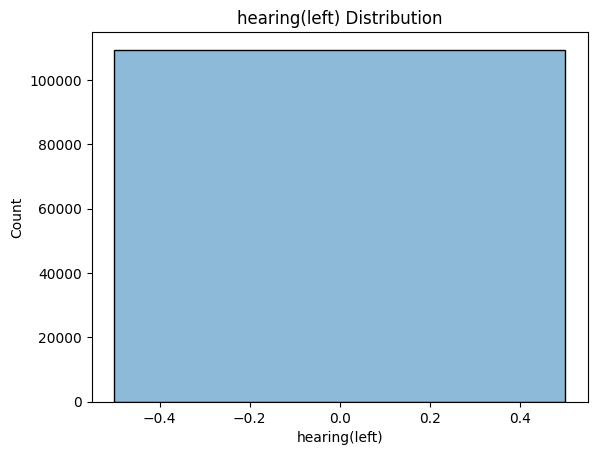

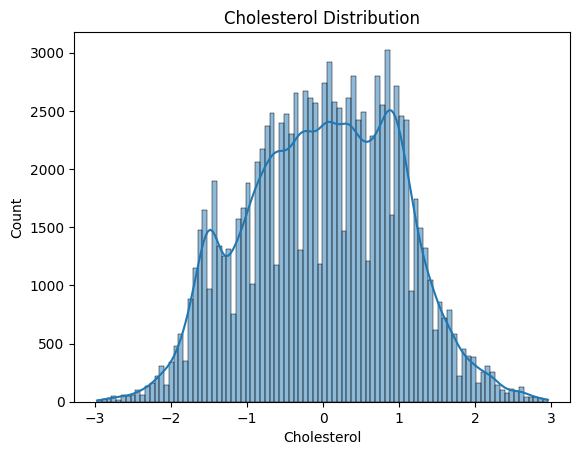

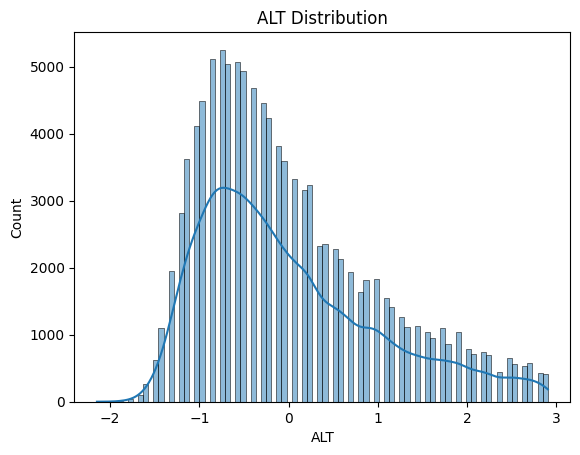

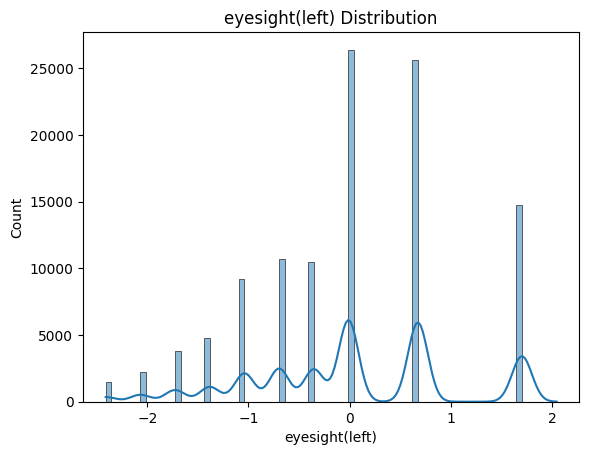

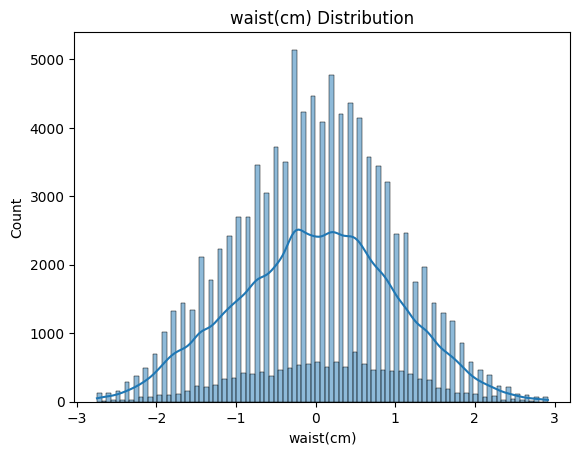

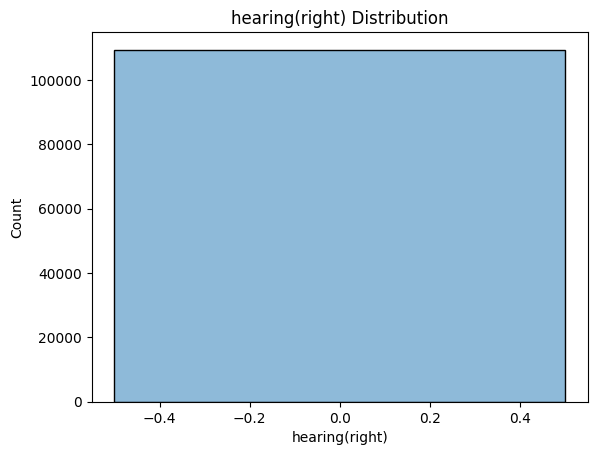

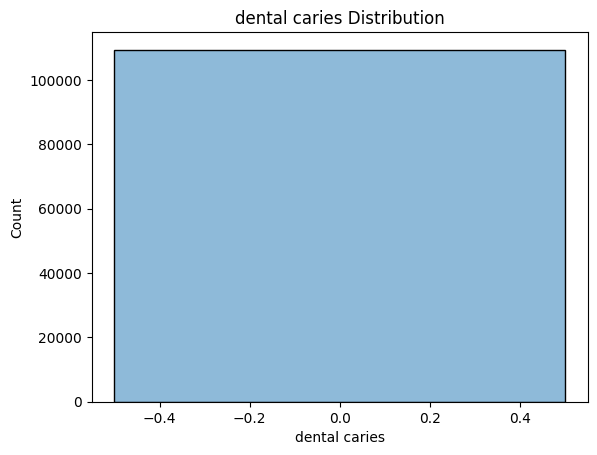

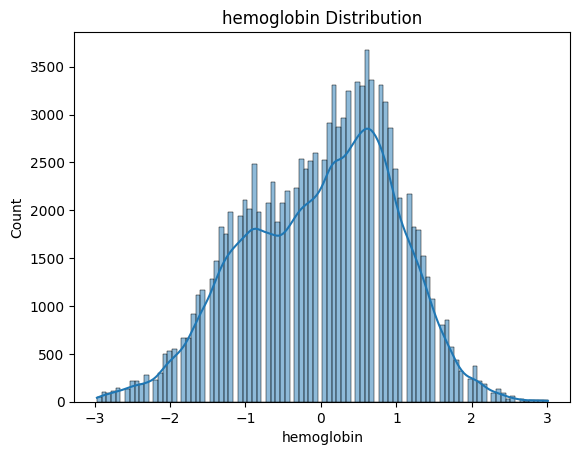

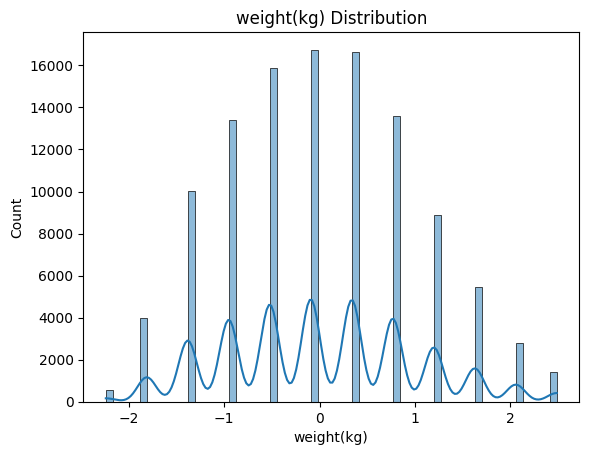

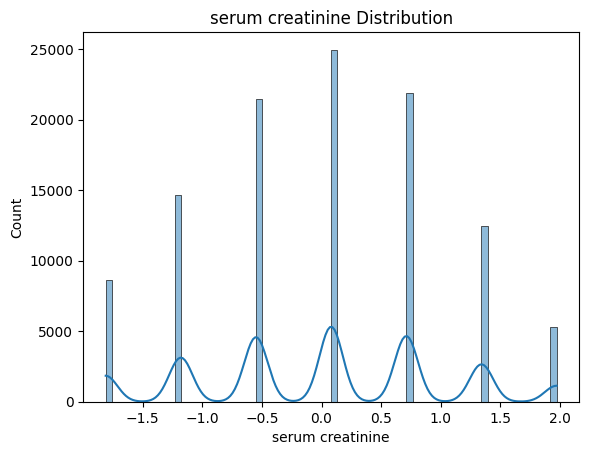

In [7]:
for column in df_scaled.columns:
    if column != 'smoking':  
        plt.figure()
        sns.histplot(df_scaled[column], kde=True)
        plt.title(f'{column} Distribution')
        plt.show()

studying the data only without paying attention to the label is not very insightful. it only helps see if some feature is skewed.

next we study each feature with respect to the label.

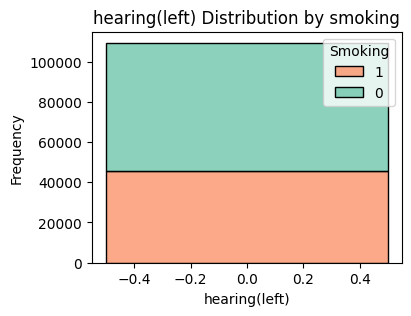

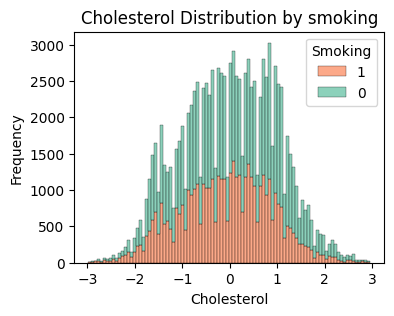

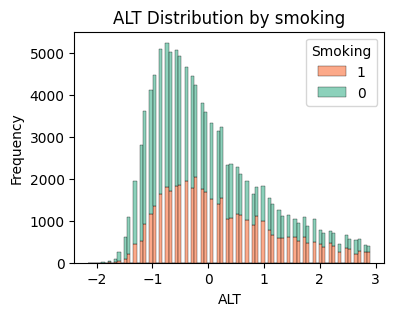

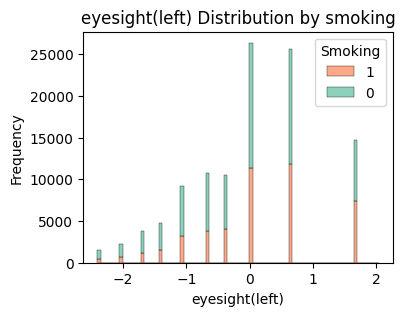

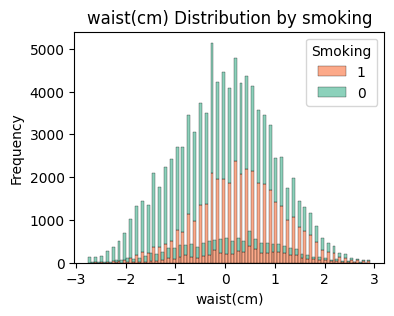

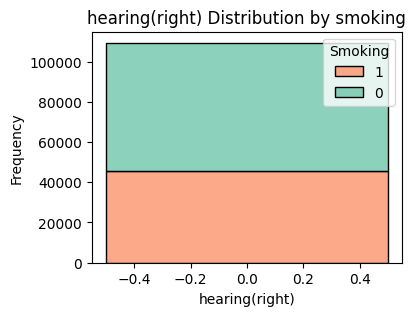

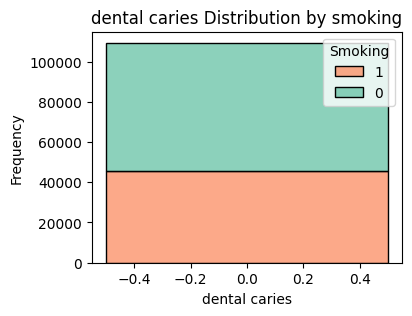

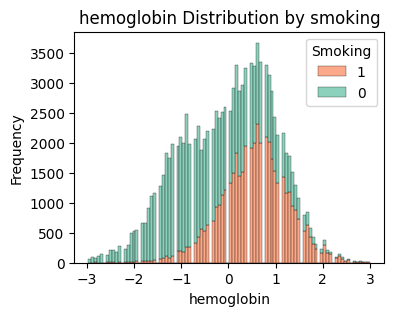

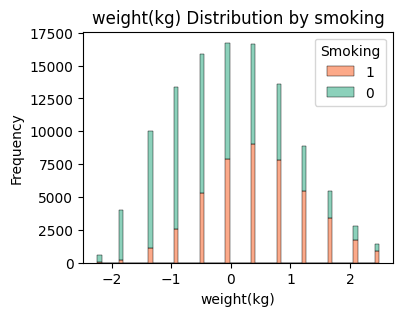

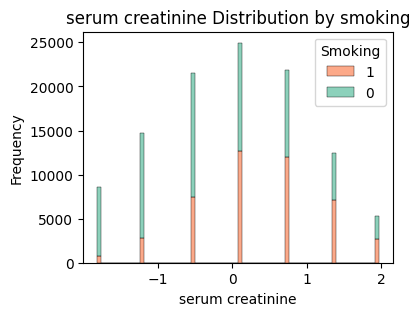

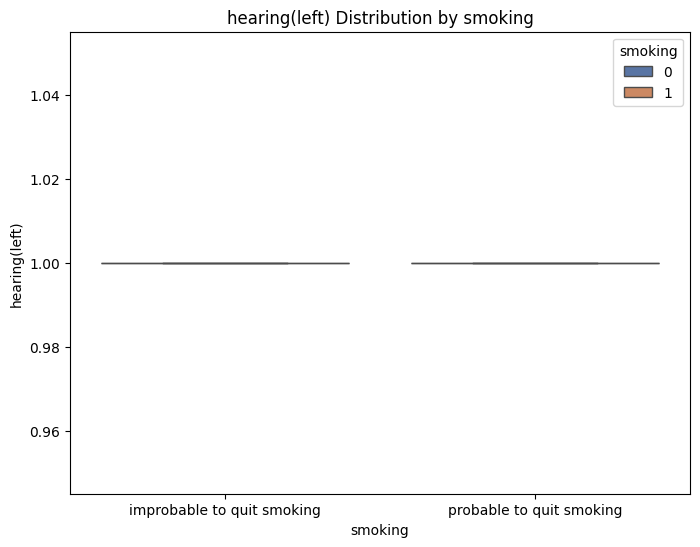

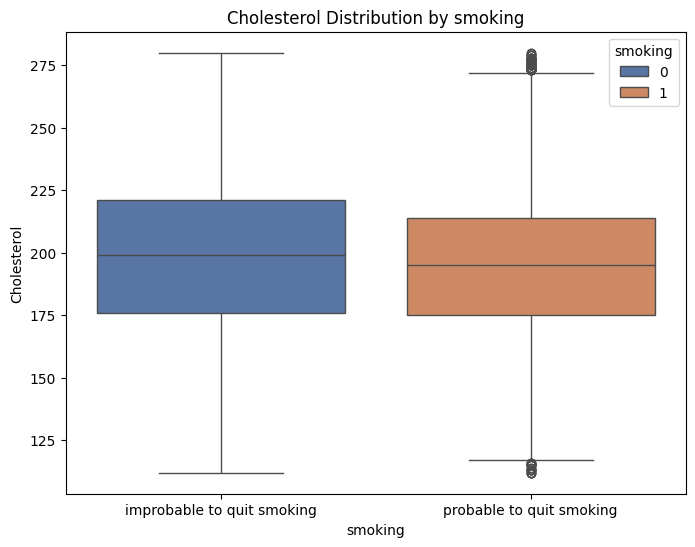

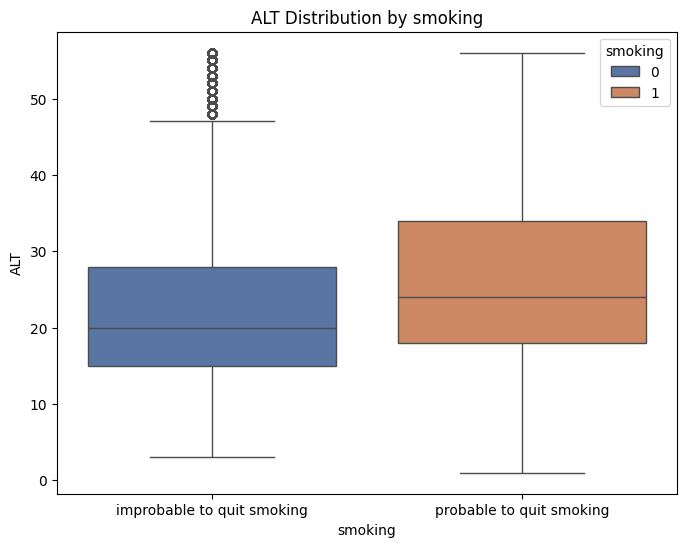

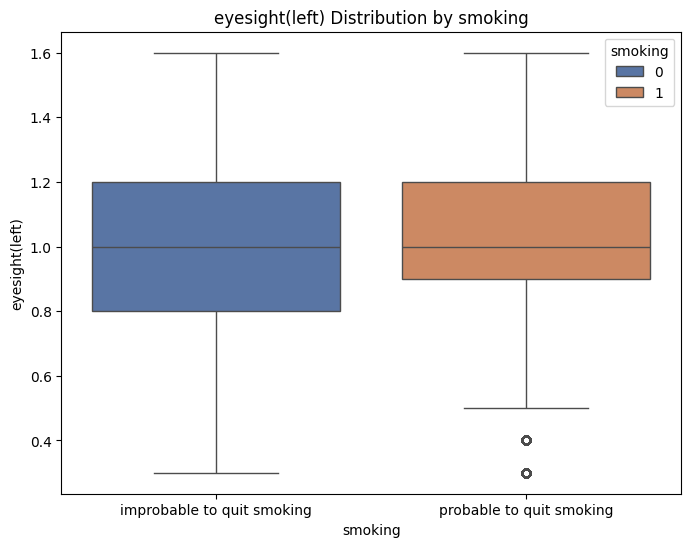

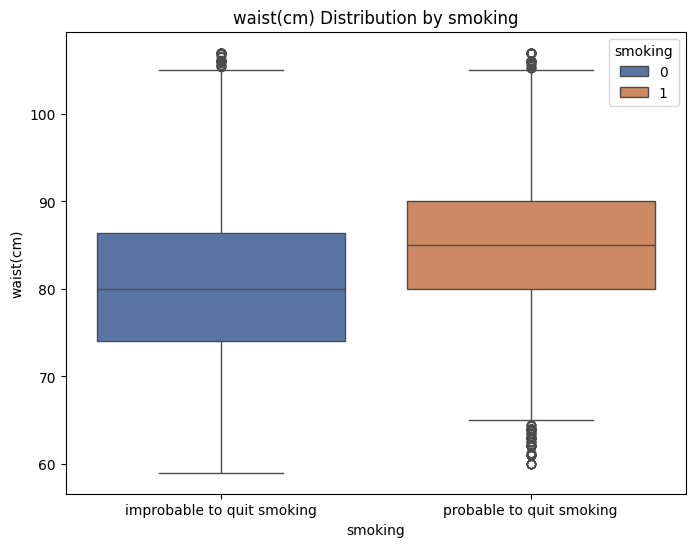

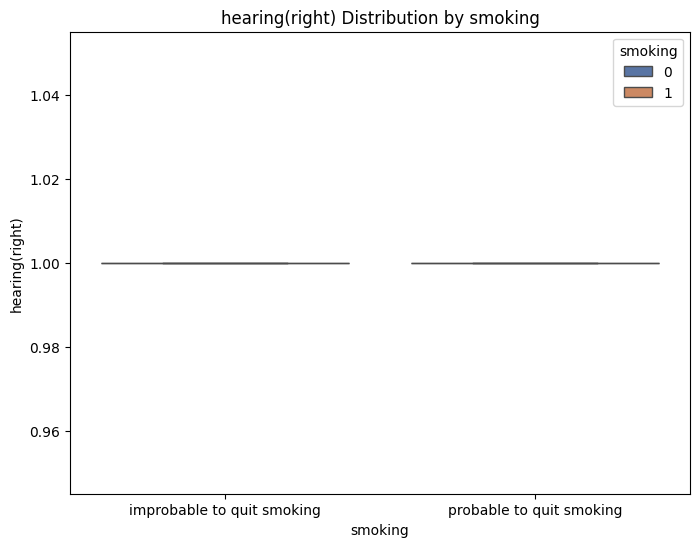

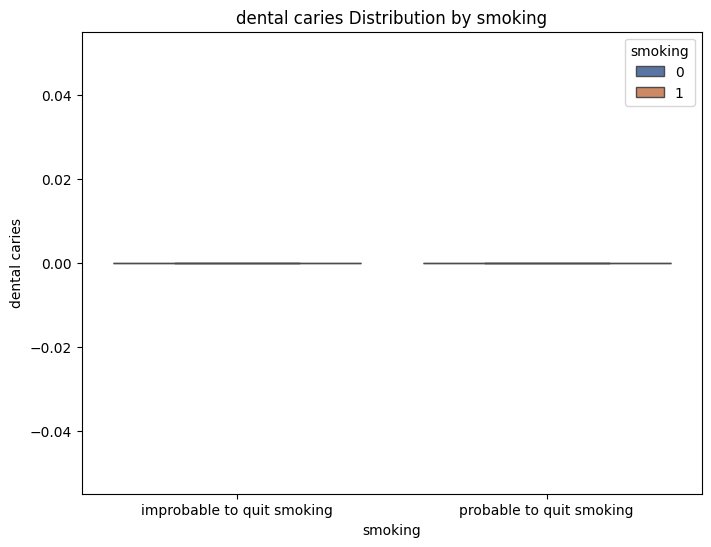

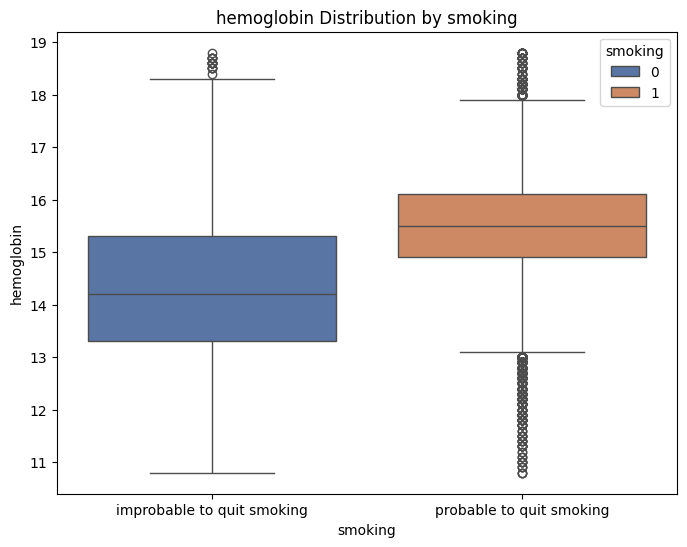

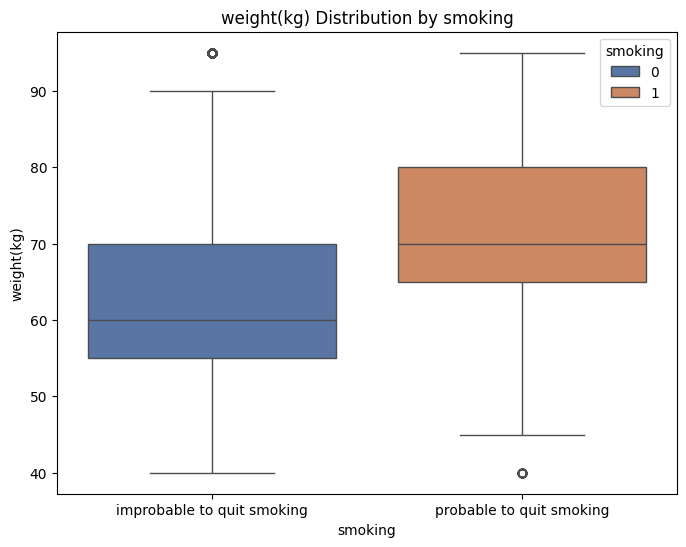

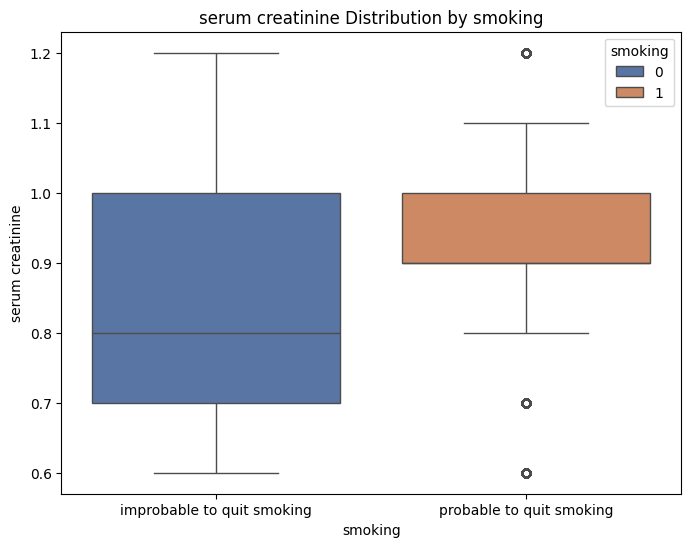

In [8]:
# Features and label
features = ['hearing(left)', 'Cholesterol', 'ALT', 'eyesight(left)', 'waist(cm)', 
            'hearing(right)', 'dental caries', 'hemoglobin', 'weight(kg)', 'serum creatinine']
label = 'smoking'

# Iterate through each feature and plot histogram
for feature in features:
    plt.figure(figsize=(4, 3))
    sns.histplot(data=df_scaled, x=feature, hue=label, multiple='stack', palette='Set2')
    plt.title(f'{feature} Distribution by {label}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Smoking', labels=df[label].unique())
    plt.show()
    
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot( x= label, y= feature, data= df, palette="deep", hue=label)
    plt.title(f'{feature} Distribution by {label}')
    plt.xlabel(label)
    plt.ylabel(feature)
    plt.xticks([0,1],['improbable to quit smoking', 'probable to quit smoking'])
    plt.show()

it becomes clear certain faetures are more indicative of a class label while others are not helpful.

helpful features:
weight, serum creatinine, hemoglobin, waist, alt.

Data Analysis : Bivariate

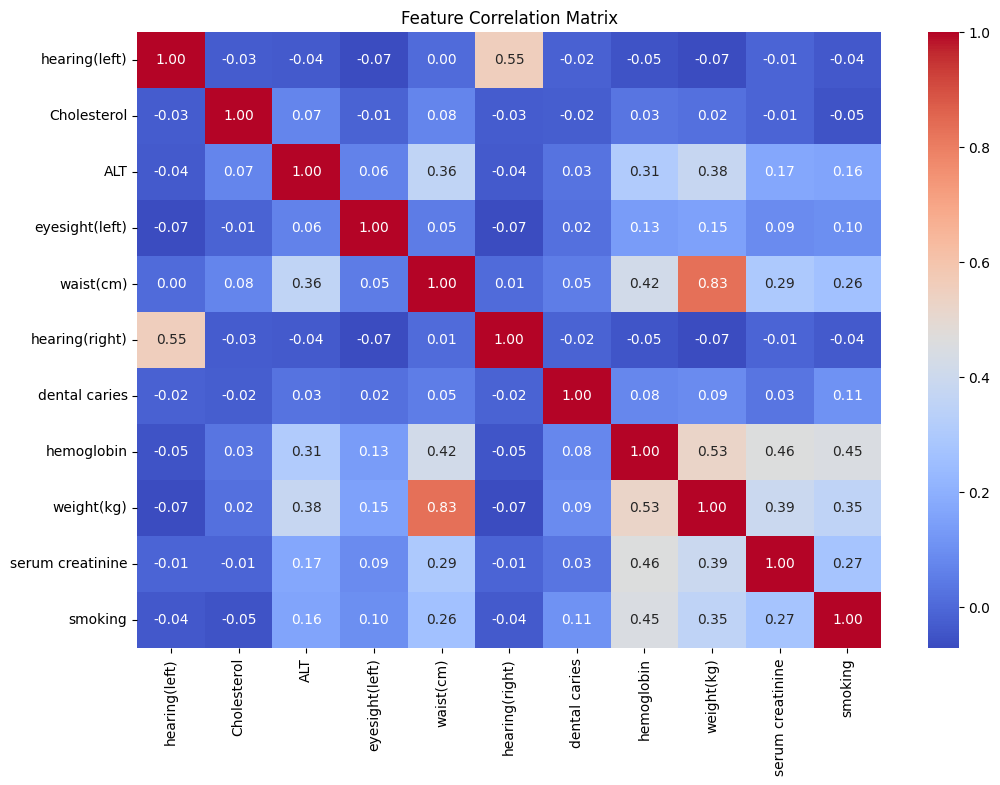

'\n[ \'ALT\', \'waist(cm)\',  \'hemoglobin\', \'weight(kg)\', \'serum creatinine\']\n\n# Scatter plots for selected pairs\nselected_pairs = [("nicotine_dependency", "daily_cigarettes"),\n                 ("carbon_monoxide_levels", "age_of_initiation")]\n\nfor x, y in selected_pairs:\n    plt.figure(figsize=(8, 6))\n    sns.scatterplot(data=data, x=x, y=y, hue="smoking_status", alpha=0.7)\n    plt.title(f"{x} vs {y}")\n    plt.xlabel(x)\n    plt.ylabel(y)\n    plt.show()\n    '

In [9]:
# Heatmap for correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


'''
[ 'ALT', 'waist(cm)',  'hemoglobin', 'weight(kg)', 'serum creatinine']

# Scatter plots for selected pairs
selected_pairs = [("nicotine_dependency", "daily_cigarettes"),
                 ("carbon_monoxide_levels", "age_of_initiation")]

for x, y in selected_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x, y=y, hue="smoking_status", alpha=0.7)
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    '''


#### we note that some features have somewhat postive correlations with one another.
 positive correlations with smoking:
 [waist, hemoglobin, weight, serum creatinine]

 paris with postive correlations:
 (ALT,weight)
 (ALT,hemoglobin)
 (ALT,waist)

 (waist,serum creatinine)
 (waist,wieght)
 (waist,hemoglobin)

 (weight,serum creatinine)
 (weight,hemoglobin)


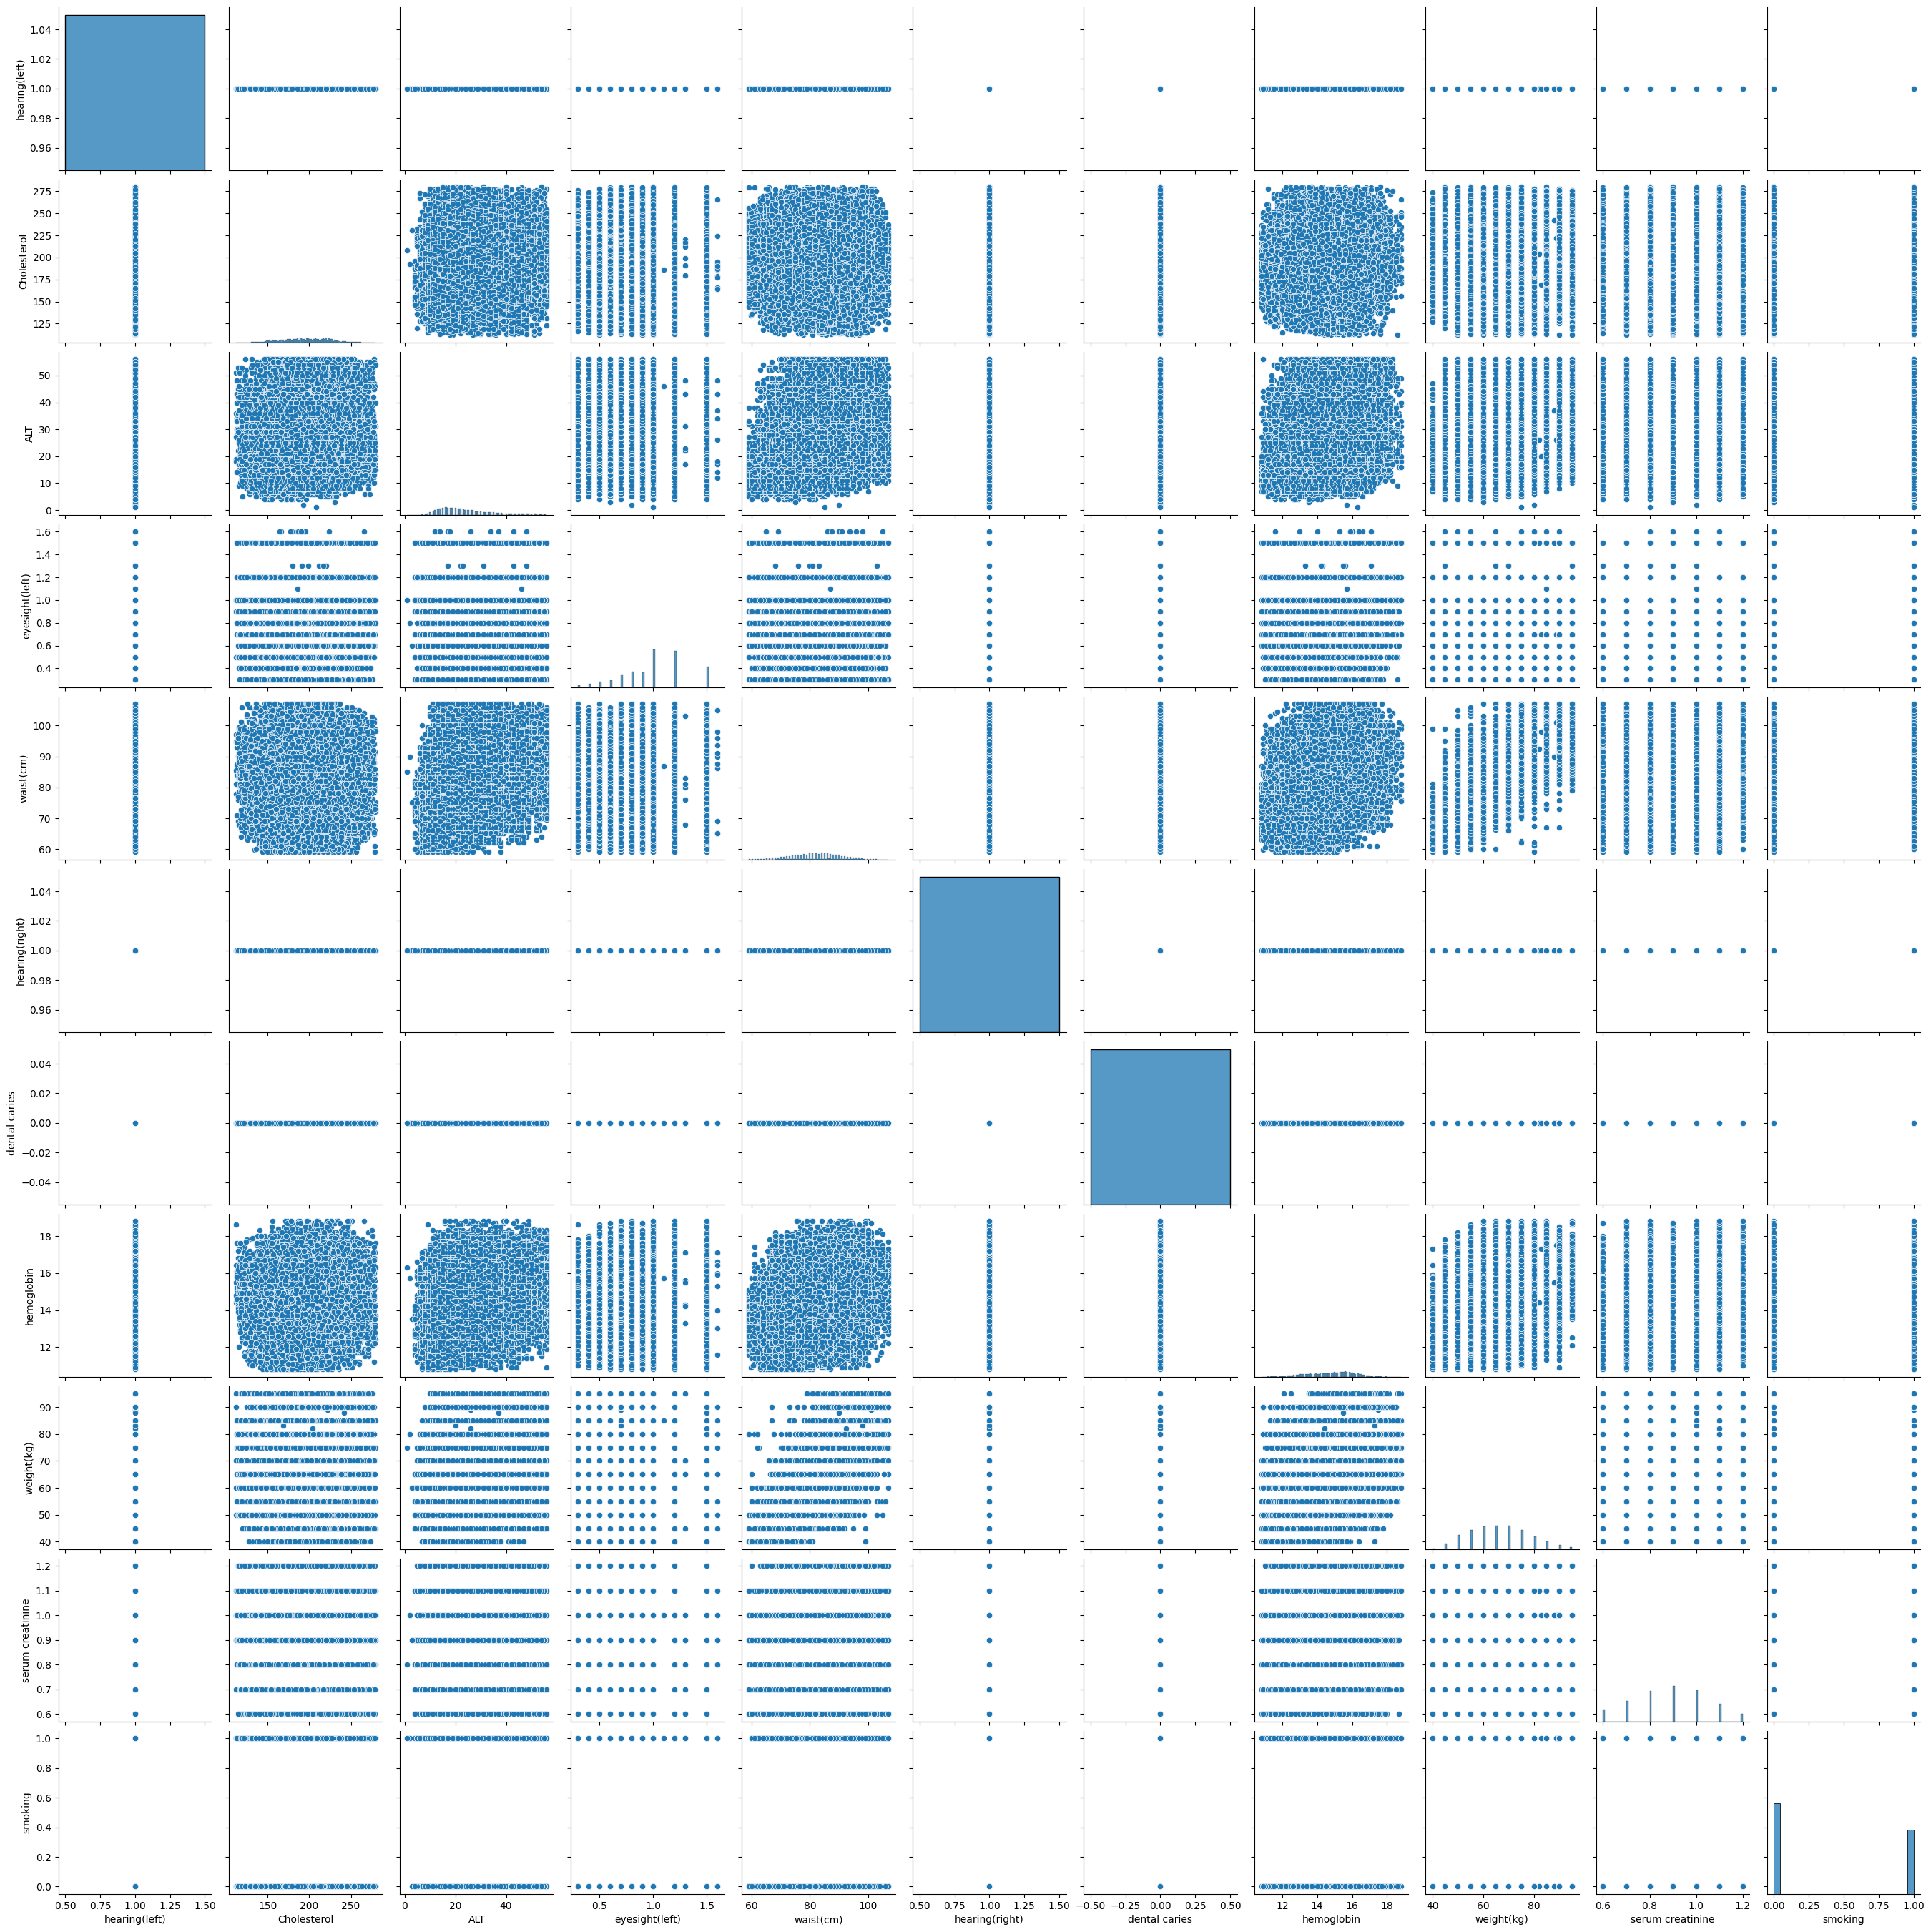

In [10]:
# Select numeric columns (or specific columns) from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Use the selected columns to create a pairplot
sns.pairplot(df[numeric_columns])  # Pass the DataFrame with numeric columns
plt.show()

Data Analysis: multivariate

using linear regression since the label is binary

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73     19189
           1       0.63      0.64      0.63     13627

    accuracy                           0.69     32816
   macro avg       0.68      0.68      0.68     32816
weighted avg       0.69      0.69      0.69     32816



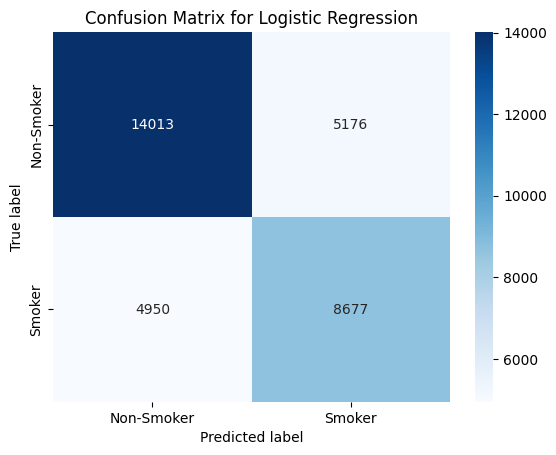

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


features = ['hearing(left)', 'Cholesterol', 'ALT', 'eyesight(left)', 'waist(cm)', 
            'hearing(right)', 'dental caries', 'hemoglobin', 'weight(kg)', 'serum creatinine']

# Split the data into training and testing sets
X = df_scaled[features]
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

PCA

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Fit PCA (assuming PCA is already fitted with n_components=2 or n_components=3)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled[features])

# Display the components and their loadings
component_df = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("PCA Components (Loadings):")
print(component_df)

# To show the absolute contributions of features for each component
feature_contributions = component_df.abs()

# Show the features that contribute most to each principal component
for i in range(pca.n_components_):
    print(f"Top contributing features for PC{i+1}:")
    top_contributors = feature_contributions.iloc[i].sort_values(ascending=False).head(3)  # top 3 features
    print(top_contributors)
    print()


PCA Components (Loadings):
     hearing(left)  Cholesterol       ALT  eyesight(left)  waist(cm)  \
PC1            0.0     0.029048  0.365620        0.149751   0.480476   
PC2            0.0     0.729967  0.230359       -0.530680   0.227157   

     hearing(right)  dental caries  hemoglobin  weight(kg)  serum creatinine  
PC1   -0.000000e+00  -0.000000e+00    0.447076    0.525516          0.368987  
PC2    5.551115e-17  -1.387779e-17   -0.146257    0.036629         -0.241099  
Top contributing features for PC1:
weight(kg)    0.525516
waist(cm)     0.480476
hemoglobin    0.447076
Name: PC1, dtype: float64

Top contributing features for PC2:
Cholesterol         0.729967
eyesight(left)      0.530680
serum creatinine    0.241099
Name: PC2, dtype: float64



note that hearing left, hearing right , and dental carries contribute very little. we might drop them for dimensionality reduction.

now, we attempt to retrain the model using only seven features(excluding hearing left, hearing right , and dental carries )

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73     19189
           1       0.63      0.64      0.63     13627

    accuracy                           0.69     32816
   macro avg       0.68      0.68      0.68     32816
weighted avg       0.69      0.69      0.69     32816



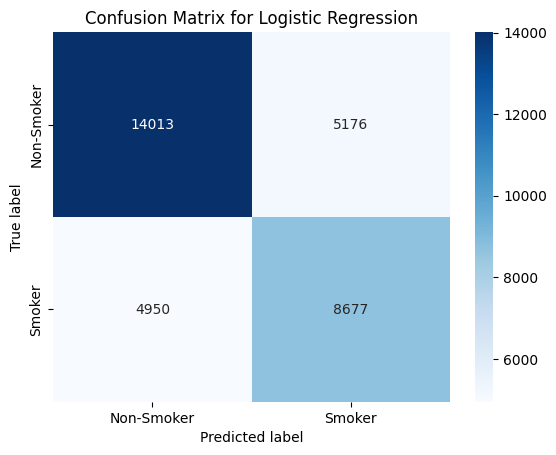

In [13]:
features = [ 'dental caries','Cholesterol', 'ALT', 'eyesight(left)', 'waist(cm)', 
              'hemoglobin', 'weight(kg)', 'serum creatinine']

# Split the data into training and testing sets
X = df_scaled[features]
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

now, we attempt to retrain the model using only the fearures with high correlation to smoking.

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74     19189
           1       0.63      0.63      0.63     13627

    accuracy                           0.69     32816
   macro avg       0.68      0.68      0.68     32816
weighted avg       0.69      0.69      0.69     32816



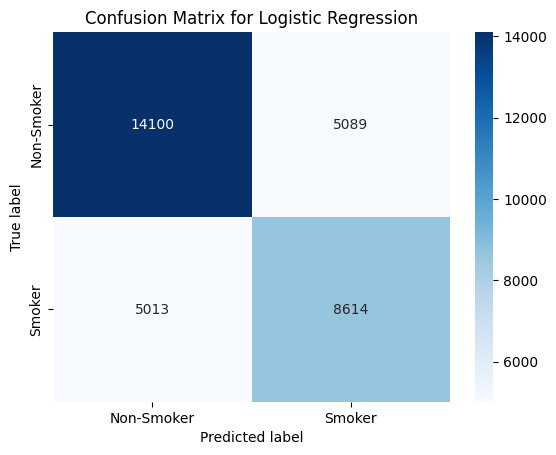

In [14]:
features = [ 'waist(cm)', 
              'hemoglobin', 'weight(kg)', 'serum creatinine']

# Split the data into training and testing sets
X = df_scaled[features]
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

note that we have managed to refuce the dimensionality drastically while getting the consistent accuracy.

## Bonus feauture engineering using DNN
 now we attempt to engineer new features to acquire even more accuracy.

In [15]:
import random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the generated dataset
df = pd.read_csv("MyData_updated.csv")  # Replace with the generated file path

# Separate features and target
X = df.drop(columns=['smoking'])  # Replace 'smoking' with your target column name
y = df['smoking']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Verify shapes
print("Training set size:", X_train.shape)
print("Validation set size:", X_valid.shape)
print("Test set size:", X_test.shape)


Training set size: (95553, 10)
Validation set size: (31851, 10)
Test set size: (31852, 10)


In [16]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Prepare your Data
# Assuming your data is stored in X_train (and also X_test for testing)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply the same transformation to the test set

# Step 2: Define the Autoencoder model
input_data = Input(shape=(X_train_scaled.shape[1],))  # Input layer shape matches the number of features
encoded = Dense(64, activation='relu')(input_data)  # First hidden layer
encoded = Dense(32, activation='relu')(encoded)  # Compressed representation
decoded = Dense(64, activation='relu')(encoded)  # Decoder layer to reconstruct
decoded = Dense(X_train_scaled.shape[1], activation='sigmoid')(decoded)  # Output layer

# Build the autoencoder model
autoencoder = Model(input_data, decoded)

# Encoder model to extract features (up to the encoded layer)
encoder = Model(input_data, encoded)

# Step 3: Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the Autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=256, shuffle=True)

# Step 5: Extract learned features using the encoder model
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# Now X_train_encoded and X_test_encoded contain the learned features from the autoencoder

# Step 6: Use these learned features with your ensemble methods
# For example, you can train a Random Forest or Gradient Boosting classifier on these features

from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier using the encoded features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)  # Assuming you have y_train (target labels)

# Evaluate on test set
test_accuracy = rf_model.score(X_test_encoded, y_test)  # Assuming you have y_test (true labels)

print(f"Test Accuracy using Random Forest on encoded features: {test_accuracy}")


Epoch 1/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - loss: 0.8477
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.6254
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.6011
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.6052
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.6062
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 0.6088
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 0.5919
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.6296
Epoch 9/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.6090
Epoch 10/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.6075
Epoch 11/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.6046
Epoch 12/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.5928
Epoch 13/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.6034
Epoch 14/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.6005
Epoch 15/50
374/374 ━━━━━━━━━

In [17]:
print("Shape of encoded training features:", X_train_encoded.shape)
print("Shape of encoded test features:", X_test_encoded.shape)


Shape of encoded training features: (95553, 32)
Shape of encoded test features: (31852, 32)


In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Feature importances (if applicable)
print("Feature importances based on the random forest classifier:")
print(rf_model.feature_importances_)


Feature importances based on the random forest classifier:
[0.02315363 0.02428218 0.04188269 0.02321582 0.02862945 0.01058184
 0.03050481 0.04269717 0.02521235 0.02387808 0.02397926 0.07283457
 0.02342531 0.02513815 0.04843634 0.03712921 0.02543701 0.0259012
 0.03617099 0.02391894 0.02412173 0.02527284 0.04831757 0.02752537
 0.02401695 0.02555493 0.04260553 0.02414962 0.02799671 0.05752739
 0.02847802 0.0280243 ]


here feature engineering proved not very useful